<a href="https://colab.research.google.com/github/shuken1019/Python25study/blob/main/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어평가를 진행하는데
# 근데 결국 테스트세트로 평가를 하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다
# 테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한
# 테스트세트를 사용하지 말아야 한다.
# 모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth=3으로 테스트 해봤는데 이것이 최선일까?
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝 해보자.

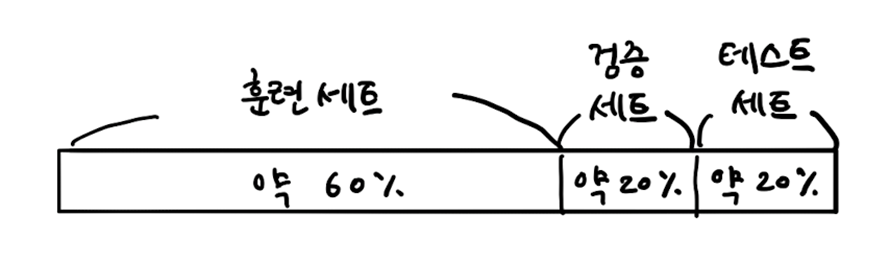

In [3]:
# 검증세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지
# 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은
# 훈련세트를 또 나누는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐
# 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함.


In [5]:
import pandas as pd
wine=pd.read_csv('https://bit.ly/wine_csv_data')
data=wine[['alcohol','sugar','pH']].to_numpy()
target=wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
#훈련세트와 테스트 세트를 나눔

train_input,test_input,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=40)#20%
#원본데이터 6497개 20%=train(5197),test(1300)
print(train_input.shape,test_input.shape)#처음엔 테스트용 20%를 분할

(5197, 3) (1300, 3)


In [7]:
#검증세트 20%생성
sub_input,val_input,sub_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)
print(sub_input.shape,val_input.shape)

(4157, 3) (1040, 3)


In [8]:
#sub_input, sub_target과 val_input,val_target을 사용해 모델을 만들고 평가함.
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)
dt.fit(sub_input,sub_target)#훈련
print(dt.score(sub_input, sub_target))# 출력 99.71%(과대적합)
print(dt.score(val_input, val_target)) # 검증 86.44%
#매개변수를 바꿔서 더 좋은 모델을 찾아야

0.9980755352417608
0.864423076923077


In [9]:
#검증세트를 만드느냐고 훈련세트가 줄었음(이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
#교차검증: 검증세트를 떼어 내어 평가하는 과정을 여러번 반복함.
#[훈련세트, 훈련세트, 검증세트]
#[훈련세트,검증세트,훈련세트]
#[검증세트, 훈련세트, 훈련세트]->패리티 방식(3-폴드 교차검증)
#5-폴드,10-폴드도 있음
#사이킷런에는 cross_validate()라는 교차검증함수를 사용
from sklearn.model_selection import cross_validate
#평가할 모델 객체를 첫번째 매개변수로 전달함(직접 검증세트를 떼지 않고 훈련세트 전체를 전달함)
scores=cross_validate(dt, train_input,train_target)
#scores=cross_validate(dt,train_input, train_target, cv=5)
#cv매개변수를 이용해 폴드수를 변경함 cv=5(기본값)
print(scores)
#fit_time(훈련시간),score_time(검증시간),test_score(최종점수)키를 가진 딕셔너리(k:v)를 반환함

{'fit_time': array([0.01313162, 0.01047516, 0.01030993, 0.0102272 , 0.01056457]), 'score_time': array([0.00184107, 0.00135088, 0.00133014, 0.00131297, 0.00133562]), 'test_score': array([0.84903846, 0.87115385, 0.85274302, 0.86621752, 0.85370549])}


In [16]:
# {'fit_time : 훈련시간 ': array([0.01590347, 0.01357985, 0.0125258 , 0.01266432, 0.01209831]),
#  'score_time : 검증시간 ': array([0.0026319 , 0.00208259, 0.00182867, 0.00198817, 0.00206494]),
#  'test_score : 검증점수 ': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [18]:
import numpy as np
print(np.mean(scores['test_score'])) # test_score 이름이지만 검증폴드의 점수임
# 5개의 검증 점수를 평균을 내어 최종 점수를 얻는다. 85.53%

0.8585716665432738


In [19]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
# 앞서 우리는 tarin_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정함
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용함
# 분류 모델일 경우 타킷 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다.

from sklearn.model_selection import StratifiedKFold#스트래피타이드(계층화된)

#scores=coss_validate(dt, train_input, train_target,cv=StratifiedKFold)

splitter=StratifiedKFold()
scores=cross_validate(dt,train_input,train_target,cv=splitter)
print(scores)




{'fit_time': array([0.04876757, 0.05712509, 0.02635217, 0.03400445, 0.0314014 ]), 'score_time': array([0.01486421, 0.00201511, 0.00337219, 0.00432396, 0.00430107]), 'test_score': array([0.84903846, 0.87115385, 0.85274302, 0.86621752, 0.85370549])}


In [21]:

# {'fit_time': array([0.02692175, 0.03336358, 0.02086091, 0.03042316, 0.02657533]),
#  'score_time': array([0.00191808, 0.00214911, 0.00205112, 0.00239015, 0.00949883]),
#   'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
print(np.mean(scores['test_score']))#85.53%

0.8585716665432738


In [30]:

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-폴드 교차 검증 수행
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores)   # 10번의 교차검증이 진행
print(np.mean(scores['test_score']))    # 10번의 검증 평균 85.74%

{'fit_time': array([0.01865864, 0.01772141, 0.01809502, 0.02197599, 0.02950931,
       0.02298856, 0.01649427, 0.01946521, 0.01646352, 0.0189786 ]), 'score_time': array([0.00203586, 0.00196958, 0.00377488, 0.00372863, 0.00189829,
       0.00200176, 0.00197101, 0.00190377, 0.00188136, 0.00202274]), 'test_score': array([0.875     , 0.85192308, 0.86538462, 0.875     , 0.85769231,
       0.88461538, 0.86538462, 0.8805395 , 0.86897881, 0.85934489])}
0.8683863198458575


In [24]:
#결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야함
#테스트세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 함

#하이퍼파라미터 튜닝
#모델 파라미터: 머신런닝 모델이 학습하는 파라미터
#하이퍼파라미터: 사용자가 지정해야만 하는 파라미터
#하이퍼파라미터 튜닝: 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
#그다음 검증세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경 1-2,5-6개의 매개변수를 제공
#AutoML:사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술

#Max_depth를 최적으로 고정하고, min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경됨
#->두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야함->다중 for문을 사용해야됨(복잡해짐)
#사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공 GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV #그리드 서치 크로스 검증용
#min_impurity_decrease 매개변수의 최적값을 찾아보자
#min_sample_split: 샘플을 최소한 몇개 이상이어야 split(하위 노드로 분리)할것인지
#클수록 가지치기(과대적합 방지), 작을수록 정확하기(과대적합)
params={'min_impurity_decrease':[0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} # 0.0001~ 증가 5번
#매개변수와 탐색할 값을 리스트를 딕셔너리로 만듦
# params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9번
#           'max_depth': range(5, 20, 1),                              # 5~20까지 15번
#           'min_samples_split': range(2, 100, 10)   # 분할 할 수 있는 샘플수를 지정 2~100까지 10번
#           }
gs=GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
#결정 트리 클래스의 객체를 생성하자마자 바로 전달함.
#일반 모델을 훈련하는 것 처럼 fit()매서드를 호출함
#이메서드를 호출하면 서치 객체는 결정트리 모델 min_impurity_decrease값을 바꿔가며 총 5번 수행
#GridSearchCV의 cv매개변수 기본값은 5임 5*5=25번 수행
#n_jobs에서 병렬 실행에 사용될 CPU코어수를 지정함(-1로 사용시 모든 코어)

gs.fit(train_input,train_target)#그리드 서치를 이용한 훈련시작
#교차검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 하지만
#사이킷런의 그리드 서치는 검증 점수가 가장 높은 모델의 매개변수 조합으로
#전체 훈련 세트에서 자동으로 다시 모델을 훈련함.

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [29]:
#이렇게 최적화 되어 훈련된 모델은 GridSearchCV 클래스로 만들어진
#객체의 best_estimator_(에스티메이터) 속성에 저장되어 있다.
#최적의 매개변수는 best_params_속성에 저장되어있다.
print(f"최적의 매개변수: {gs.best_params_}")#암기
#각 매개변수에서 수행한 교차 검증의 평균점수는 cv_results_속성의 'mean_test_score'키에 저장되어 있다.
#최적의 매개변수{'min_impurity_decrease':0.0003}

최적의 매개변수: {'min_impurity_decrease': 0.0003}
